## *IMPORTING THE NECESSARY LIBRARIES*

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
import io
%cd "E:\Data Science Projects\House price prediction"

E:\Data Science Projects\House price prediction


In [13]:
train_df = pd.read_csv('TRAINING_.csv')

In [14]:
test_df = pd.read_csv('TEST_.csv')

In [15]:
train_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [16]:
train_df.info() # we can observe that there are nulll values in the train_df dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [17]:
test_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [18]:
test_df.info() # we can observe that there are nulll values in the test_df dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


#### to impute the missing values we combine both the train_df dataset and test_df dataset

In [19]:
test_df["Grade"]="test" # we have added a new column into test_df and imputed with a code"test", so that both the datasets 
                        #can be combined 

In [20]:
test_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,test
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,test
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,test
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,test
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,test


In [21]:
combined_df=pd.concat([train_df,test_df],axis=0)


In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10296 non-null  float64
 3   Nbedrooms    10295 non-null  float64
 4   Nbwashrooms  10296 non-null  float64
 5   Twashrooms   10298 non-null  float64
 6   roof         8293 non-null   object 
 7   Roof(Area)   8293 non-null   float64
 8   Lawn(Area)   10296 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10297 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.2+ MB


In [23]:
combined_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [24]:
combined_df.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [25]:
combined_df.shape

(10299, 14)

In [26]:
combined_df.columns

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

#### *MISSING VALUE IMPUTATION*

In [27]:
combined_df.Nbedrooms.value_counts(dropna=False)


Nbedrooms
4.0    2037
6.0    2029
5.0    2023
3.0    1416
7.0    1401
2.0     696
8.0     693
NaN       4
Name: count, dtype: int64

In [28]:
combined_df.Nbedrooms.describe()

count    10295.000000
mean         4.995435
std          1.644379
min          2.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: Nbedrooms, dtype: float64

In [29]:
combined_df.Nbedrooms.fillna(4.0,inplace=True) #most occuring is 4

In [30]:
combined_df.Troom.value_counts(dropna=False)


Troom
9.0    2095
5.0    2081
7.0    2066
6.0    2028
8.0    2026
NaN       3
Name: count, dtype: int64

In [31]:
combined_df.Troom.describe()

count    10296.000000
mean         7.002525
std          1.419969
min          5.000000
25%          6.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Troom, dtype: float64

In [32]:
combined_df.Troom.fillna(7,inplace=True) ## as the mean is very closer to 7


In [33]:
combined_df.Nbwashrooms.value_counts(dropna=False)


Nbwashrooms
3.0    2090
5.0    2080
4.0    2026
6.0    1540
2.0    1526
7.0     523
1.0     511
NaN       3
Name: count, dtype: int64

In [34]:
combined_df.Nbwashrooms.fillna(3.0,inplace=True) # most occuring is 


In [35]:
combined_df.Twashrooms.value_counts(dropna=False)


Twashrooms
4.0    2113
6.0    2078
7.0    2069
5.0    2021
8.0    1019
3.0     998
NaN       1
Name: count, dtype: int64

In [36]:
combined_df.Twashrooms.fillna(combined_df.Twashrooms.value_counts().idxmax(),inplace=True)

In [37]:
combined_df['Lawn(Area)'].describe()

count    10296.000000
mean        90.013112
std         11.824232
min         70.000000
25%         80.000000
50%         90.000000
75%        100.000000
max        110.000000
Name: Lawn(Area), dtype: float64

In [38]:
combined_df['Lawn(Area)'].fillna(combined_df['Lawn(Area)'].mean(),inplace=True)

In [39]:
combined_df.API.describe()


count    10297.000000
mean        79.029038
std         11.839374
min         59.000000
25%         69.000000
50%         79.000000
75%         89.000000
max         99.000000
Name: API, dtype: float64

In [40]:
combined_df.API.fillna(combined_df.API.mean(),inplace=True)


In [41]:
combined_df.isnull().sum()


id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           2006
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [42]:
combined_df.roof.value_counts(dropna=False)


roof
no     2100
NO     2095
yes    2063
YES    2035
NaN    2006
Name: count, dtype: int64

###### SINCE THERE ARE MANY NaN VALUES, IMPUTING THESE IN ANY OF THE CATEGORY MAY LEAD TO BIAS, AND THE MODEL MIGHT NOT PERFROM WELL, WE ARE GOING TO NAME IT AS UNKNOWN

In [43]:
combined_df.roof.replace(['no','NO'],'No',inplace=True) ## both no and NO signifies the same category, so have been combined
                                                        


In [44]:
combined_df.roof.replace(['yes','YES'],'Yes',inplace=True)## both yes and YES signifies the same category, so have been combined

In [45]:
combined_df.roof.fillna('Not known',inplace=True)


In [46]:
combined_df["Roof(Area)"].value_counts(dropna=False)


Roof(Area)
0.0      4195
NaN      2006
84.0      108
88.0       99
112.0      95
80.0       95
105.0      94
117.0      94
95.0       93
90.0       92
118.0      89
114.0      89
98.0       88
111.0      88
113.0      88
94.0       87
82.0       86
93.0       85
120.0      85
79.0       85
96.0       85
75.0       84
78.0       84
72.0       84
97.0       84
107.0      83
71.0       82
91.0       81
86.0       81
73.0       80
102.0      79
103.0      78
99.0       78
101.0      78
108.0      77
119.0      77
87.0       77
115.0      76
106.0      76
109.0      76
77.0       76
81.0       75
74.0       74
76.0       73
104.0      73
89.0       73
92.0       72
85.0       71
116.0      71
100.0      69
110.0      68
83.0       63
Name: count, dtype: int64

In [47]:
combined_df['Roof(Area)'].fillna(combined_df['Roof(Area)'].mean(),inplace=True)

In [48]:
combined_df.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [49]:
combined_df.info() ## here we can see that the column EXPECTED is been taken as object, which infact to be considered as int or float
                   # as this column represent the Expected Price of the House

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10299 non-null  float64
 3   Nbedrooms    10299 non-null  float64
 4   Nbwashrooms  10299 non-null  float64
 5   Twashrooms   10299 non-null  float64
 6   roof         10299 non-null  object 
 7   Roof(Area)   10299 non-null  float64
 8   Lawn(Area)   10299 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10299 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.2+ MB


In [50]:
combined_df.EXPECTED=combined_df.EXPECTED.str.replace('$','')


In [51]:
combined_df.head() ## now the special character is been succesfully removed

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,No,0.000000,76.0,2,63.0,4,D,3826
1,2,344,6.0,7.0,7.0,8.0,No,0.000000,83.0,7,97.0,1,B,4458
2,3,294,8.0,4.0,3.0,4.0,Yes,97.000000,78.0,1,88.0,4,C,4199
3,4,328,5.0,4.0,2.0,4.0,No,0.000000,91.0,5,86.0,1,D,3462
4,5,295,9.0,5.0,3.0,5.0,Not known,47.223321,97.0,4,93.0,3,C,4543


In [52]:
combined_df.EXPECTED=combined_df.EXPECTED.astype(float)


In [53]:
combined_df.info() ## data type of EXPECTED column has been changed.

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10299 non-null  float64
 3   Nbedrooms    10299 non-null  float64
 4   Nbwashrooms  10299 non-null  float64
 5   Twashrooms   10299 non-null  float64
 6   roof         10299 non-null  object 
 7   Roof(Area)   10299 non-null  float64
 8   Lawn(Area)   10299 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10299 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 1.2+ MB


## EXPLORATORY DATA ANALYSIS

In [54]:
numcols=combined_df.select_dtypes(include=np.number)
objcols=combined_df.select_dtypes(include=['object'])

In [55]:
numcols.columns

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED'],
      dtype='object')

In [56]:
objcols.columns

Index(['roof', 'Grade'], dtype='object')

<Axes: >

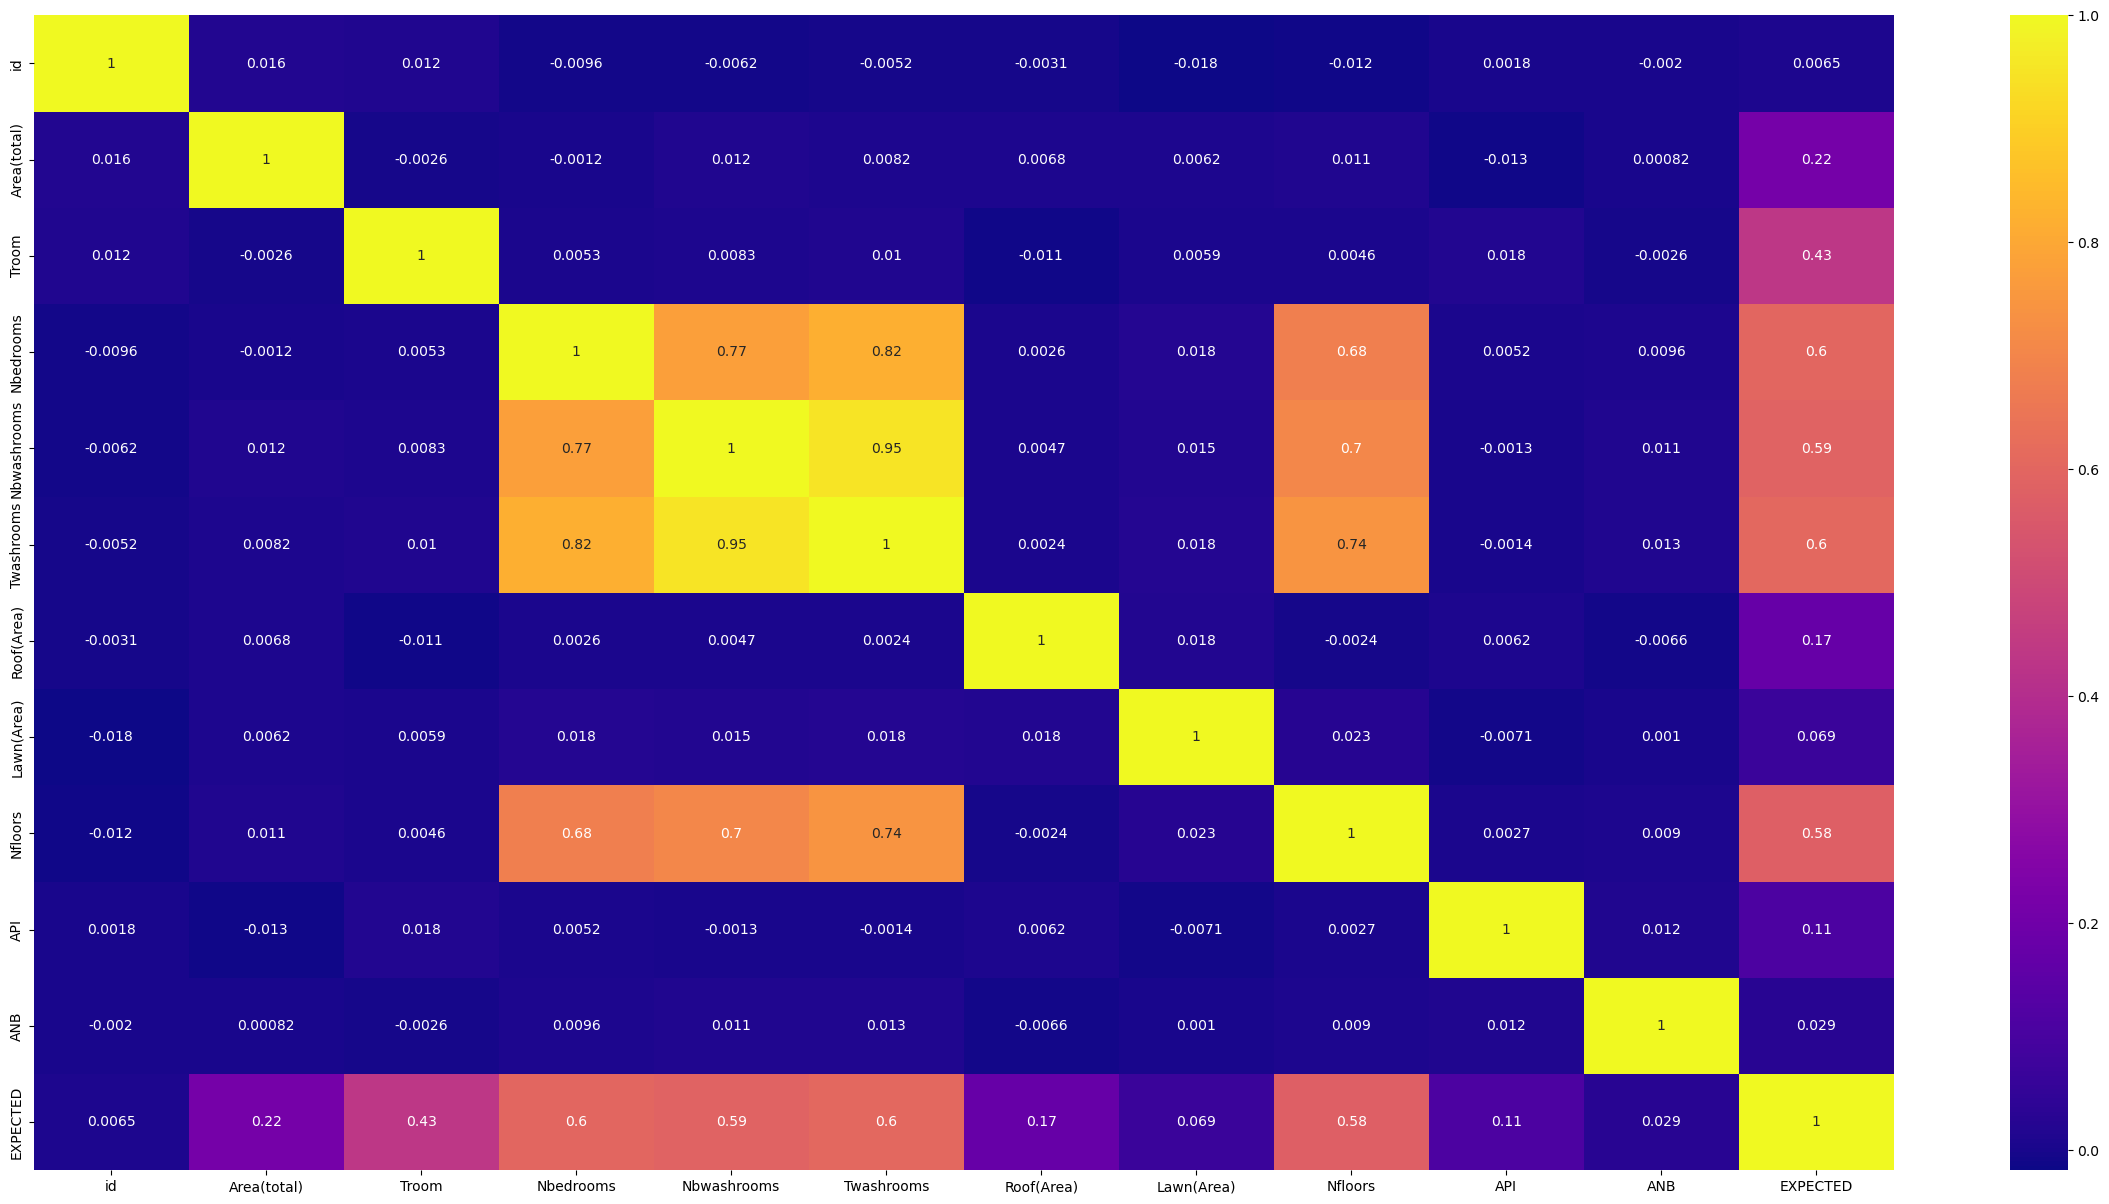

In [57]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols.corr(),annot=True,cmap="plasma")

######  let us seperate the train and test data 

In [58]:
train_data = combined_df[combined_df.Grade!='test']
test_data = combined_df[combined_df.Grade=='test'].drop('Grade',axis=1)


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        7000 non-null   float64
 3   Nbedrooms    7000 non-null   float64
 4   Nbwashrooms  7000 non-null   float64
 5   Twashrooms   7000 non-null   float64
 6   roof         7000 non-null   object 
 7   Roof(Area)   7000 non-null   float64
 8   Lawn(Area)   7000 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          7000 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 820.3+ KB


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3299 non-null   float64
 3   Nbedrooms    3299 non-null   float64
 4   Nbwashrooms  3299 non-null   float64
 5   Twashrooms   3299 non-null   float64
 6   roof         3299 non-null   object 
 7   Roof(Area)   3299 non-null   float64
 8   Lawn(Area)   3299 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3299 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 360.8+ KB


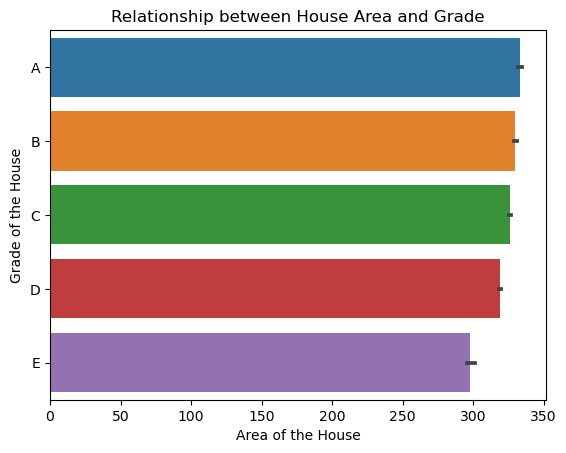

In [61]:
sns.barplot(x='Area(total)', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between House Area and Grade')
plt.xlabel('Area of the House')
plt.ylabel('Grade of the House')
plt.show()

###### interpretation:

Availability of C grade houses are more compared to the other grades.
Availability of E grade houses are the least.

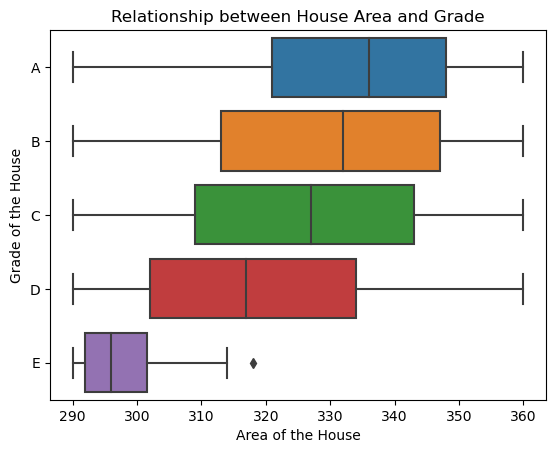

In [63]:
sns.boxplot(x='Area(total)', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between House Area and Grade')
plt.xlabel('Area of the House')
plt.ylabel('Grade of the House')
plt.show()

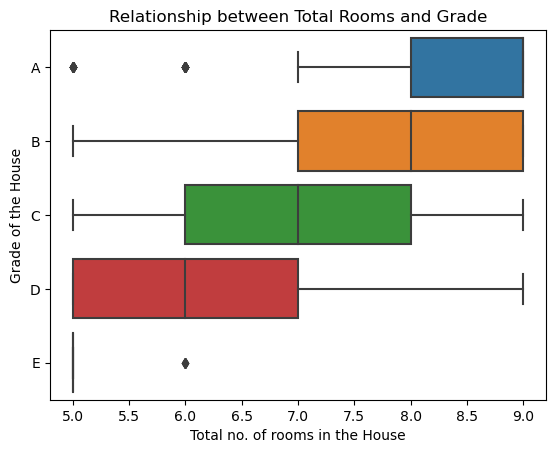

In [65]:
sns.boxplot(x='Troom', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Total Rooms and Grade')
plt.xlabel('Total no. of rooms in the House')
plt.ylabel('Grade of the House')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15412\843691199.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train_df['Grade'],y=train_data['Troom'],ci=None,palette='winter')


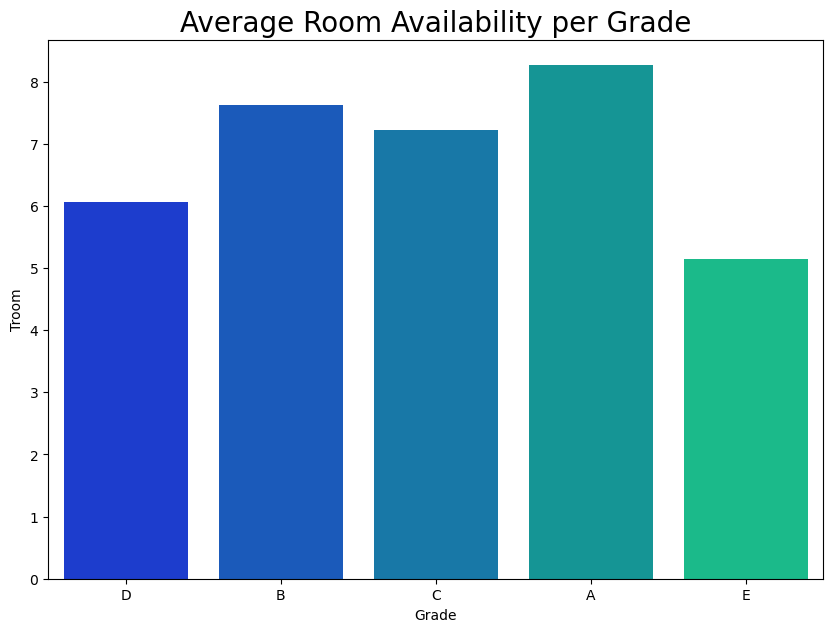

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x=train_df['Grade'],y=train_data['Troom'],ci=None,palette='winter')
plt.title('Average Room Availability per Grade',fontsize=20)
plt.show()

###### Interpretation: Average availability of rooms in A grade houses are more and E grade houses are less compared to other grades.

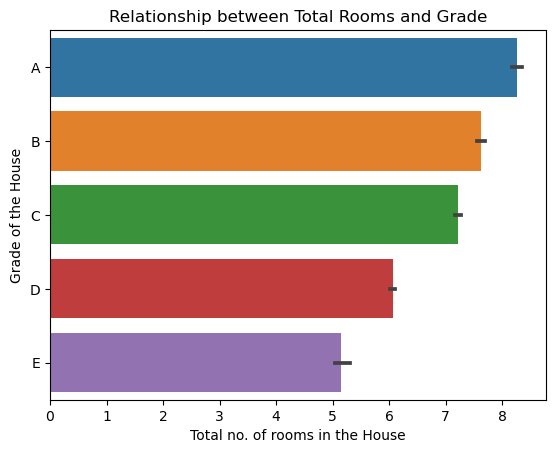

In [67]:
sns.barplot(x='Troom', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Total Rooms and Grade')
plt.xlabel('Total no. of rooms in the House')
plt.ylabel('Grade of the House')
plt.show()

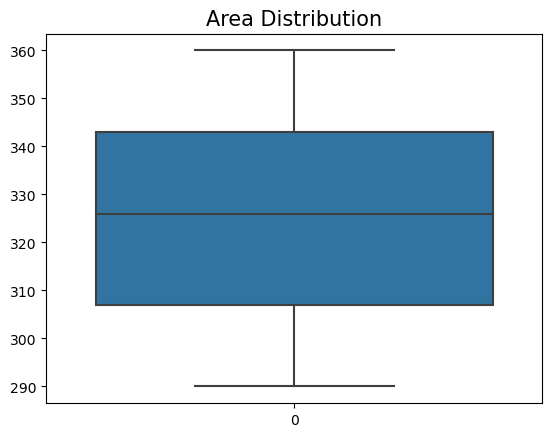

In [68]:
sns.boxplot(train_data['Area(total)'])
plt.title('Area Distribution',fontsize=15)
plt.show()

###### Interpretation: Most houses are of area between 310 to 340.

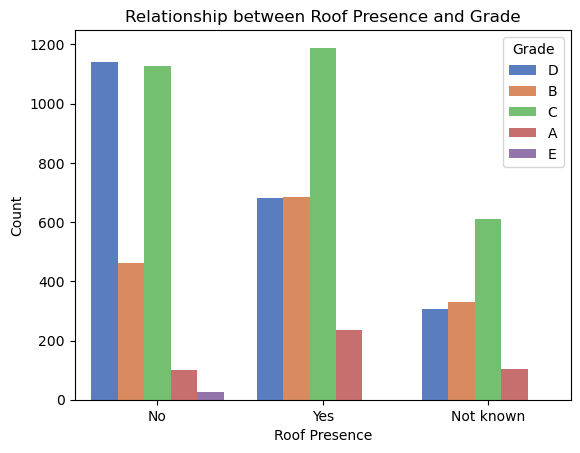

In [69]:
sns.countplot(x='roof', hue='Grade', data=train_data, palette='muted')

plt.title('Relationship between Roof Presence and Grade')
plt.xlabel('Roof Presence')
plt.ylabel('Count')
plt.show()

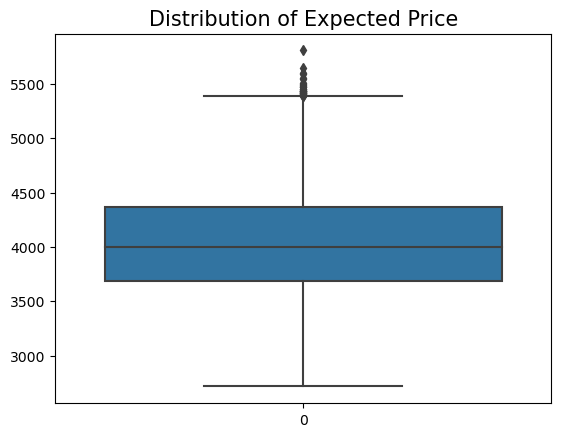

In [70]:
sns.boxplot(train_data['EXPECTED'])
plt.title('Distribution of Expected Price',fontsize=15)
plt.show()

###### nterpretation: Most houses are of priced between 3600 to 4400., and there are some extreme values too

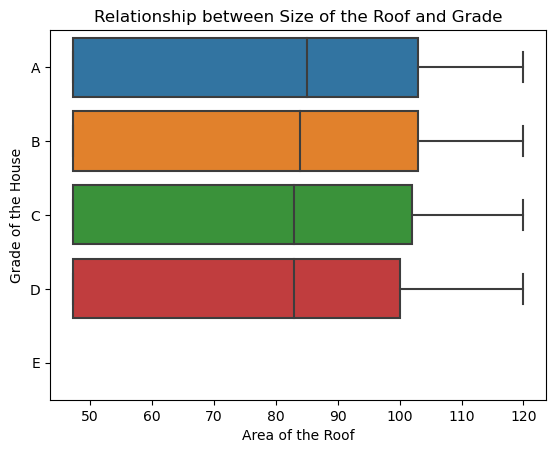

In [71]:
sns.boxplot(x='Roof(Area)', y='Grade', data=train_data[train_data['Roof(Area)']!=0.0],order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Size of the Roof and Grade')
plt.xlabel('Area of the Roof')
plt.ylabel('Grade of the House')
plt.show()


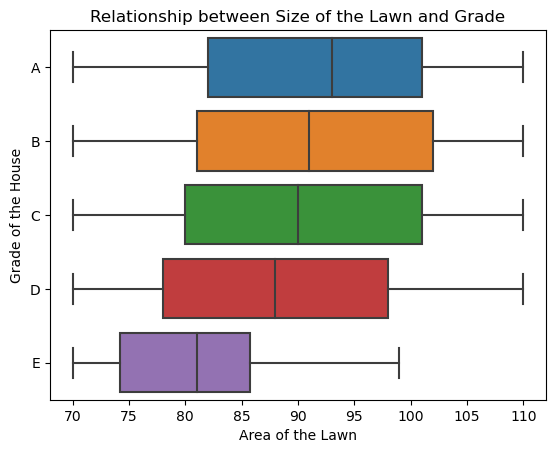

In [72]:
sns.boxplot(x='Lawn(Area)', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Size of the Lawn and Grade')
plt.xlabel('Area of the Lawn')
plt.ylabel('Grade of the House')
plt.show()

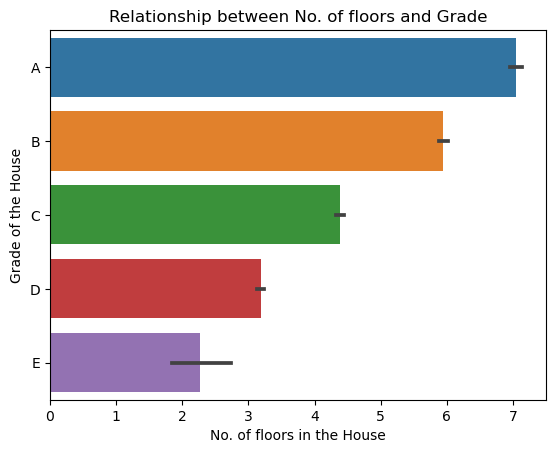

In [73]:
sns.barplot(x='Nfloors', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between No. of floors and Grade')
plt.xlabel('No. of floors in the House')
plt.ylabel('Grade of the House')
plt.show()

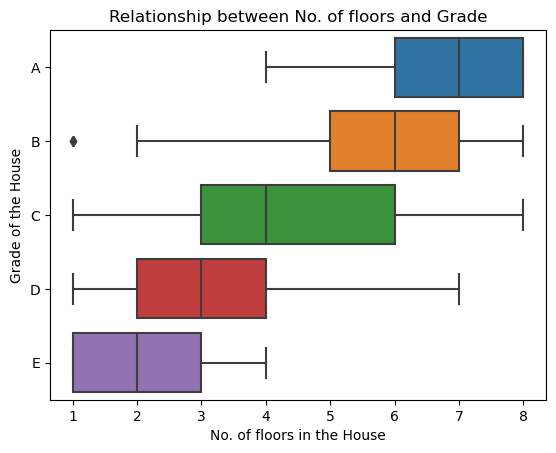

In [74]:
sns.boxplot(x='Nfloors', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between No. of floors and Grade')
plt.xlabel('No. of floors in the House')
plt.ylabel('Grade of the House')
plt.show()

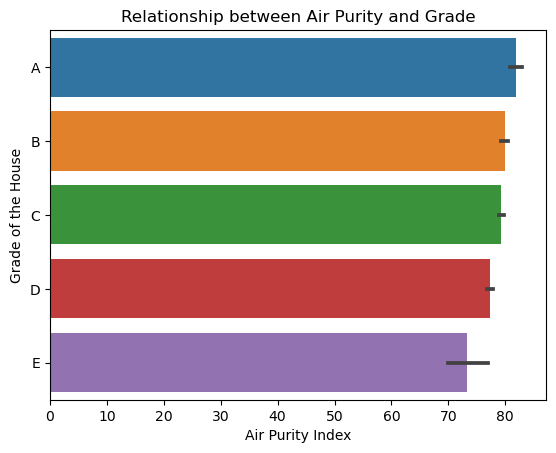

In [75]:
sns.barplot(x='API', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Air Purity and Grade')
plt.xlabel('Air Purity Index')
plt.ylabel('Grade of the House')
plt.show()

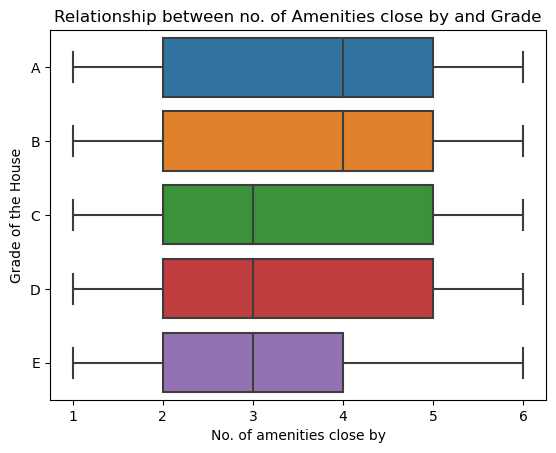

In [76]:
sns.boxplot(x='ANB', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between no. of Amenities close by and Grade')
plt.xlabel('No. of amenities close by')
plt.ylabel('Grade of the House')
plt.show()

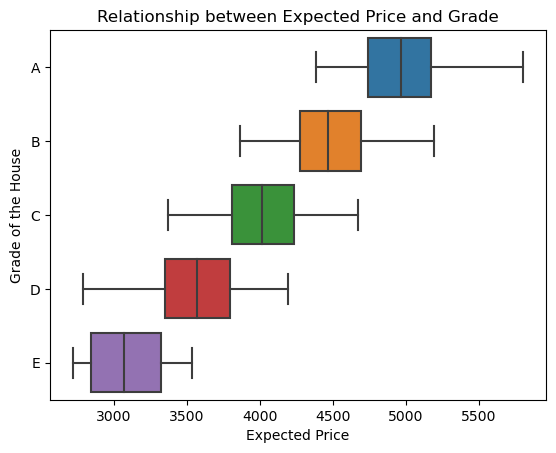

In [77]:
sns.boxplot(x='EXPECTED', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Expected Price and Grade')
plt.xlabel('Expected Price')
plt.ylabel('Grade of the House')
plt.show()

###### HYPOTHESIS TESTING

###### T-test Independent

###### ANNOVA

In [78]:
from scipy.stats import f_oneway


In [79]:
np.round(train_data.API.groupby(train_data.Grade).mean(),0)


Grade
A    82.0
B    80.0
C    79.0
D    77.0
E    73.0
Name: API, dtype: float64

In [80]:
grade_A = train_data[train_data.Grade=='A']
grade_B = train_data[train_data.Grade=='B']
grade_C = train_data[train_data.Grade=='C']
grade_D = train_data[train_data.Grade=='D']
grade_E = train_data[train_data.Grade=='E']

In [81]:
#Null Hypothesis : There is no significant relationship between API and Grade
# Alternative hypothesis : There is significant  relationship between API and Grade


In [82]:
f_oneway(grade_A.API,grade_B.API,grade_C.API,grade_D.API,grade_E.API)


F_onewayResult(statistic=21.920238783250937, pvalue=5.3094016537447315e-18)

In [83]:
#since p value is less than 0.05  reject the null hypothesis

In [84]:
np.round(train_data.Troom.groupby(train_data.Grade).mean(),0)

Grade
A    8.0
B    8.0
C    7.0
D    6.0
E    5.0
Name: Troom, dtype: float64

In [85]:
f_oneway(grade_A.Troom,grade_B.Troom,grade_C.Troom,grade_D.Troom,grade_E.Troom)


F_onewayResult(statistic=550.2632073396883, pvalue=0.0)

In [86]:
#Null Hypothesis : There is no significant relationship between Troom and Grade
# Alternative hypothesis : There is significant  relationship between Troom and Grade


In [87]:
#since p value is less than 0.05  reject the null hypothesis

###### Chi-Square- Test

In [88]:
from scipy.stats import chi2_contingency

In [89]:
chi2_contingency(pd.crosstab(train_data.roof,train_data.Grade))


Chi2ContingencyResult(statistic=305.1745404999348, pvalue=3.2595706976789916e-61, dof=8, expected_freq=array([[ 180.27285714,  601.58928571, 1194.20571429,  868.32785714,
          10.60428571],
       [  85.43228571,  285.09642857,  565.94057143,  411.50528571,
           5.02542857],
       [ 176.29485714,  588.31428571, 1167.85371429,  849.16685714,
          10.37028571]]))

In [90]:
#NULL:there is no association between both the variables 
# Alt : there is some association between both the variables

In [91]:
# since P-values is 1.0303371747549007e-27, which is less than 0.05, we reject the null hypothesis

In [92]:
test_data['Grade']='test'

In [93]:
combine_data = pd.concat([train_data,test_data],axis=0)

In [94]:
combine_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,No,0.000000,76.0,2,63.0,4,D,3826.0
1,2,344,6.0,7.0,7.0,8.0,No,0.000000,83.0,7,97.0,1,B,4458.0
2,3,294,8.0,4.0,3.0,4.0,Yes,97.000000,78.0,1,88.0,4,C,4199.0
3,4,328,5.0,4.0,2.0,4.0,No,0.000000,91.0,5,86.0,1,D,3462.0
4,5,295,9.0,5.0,3.0,5.0,Not known,47.223321,97.0,4,93.0,3,C,4543.0


In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
continuous_columns = ['Area(total)','Roof(Area)','Lawn(Area)','API','EXPECTED']

In [97]:
scaler = StandardScaler()
combine_data[continuous_columns] = scaler.fit_transform(combine_data[continuous_columns])


In [98]:
combine_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,-0.976671,8.0,2.0,1.0,3.0,No,-1.077416,-1.185348,2,-1.354073,4,D,-0.419853
1,2,0.927560,6.0,7.0,7.0,8.0,No,-1.077416,-0.593229,7,1.518119,1,B,0.861792
2,3,-1.513762,8.0,4.0,3.0,4.0,Yes,1.135672,-1.016171,1,0.757833,4,C,0.336561
3,4,0.146337,5.0,4.0,2.0,4.0,No,-1.077416,0.083479,5,0.588881,1,D,-1.158016
4,5,-1.464936,9.0,5.0,3.0,5.0,Not known,0.000000,0.591011,4,1.180214,3,C,1.034165


In [99]:
replacement_dict = {'No':0,'Yes':1}
combine_data['roof'] = combine_data['roof'].replace(replacement_dict)

In [100]:
combine_data['roof_unknown'] = (combine_data['roof'] == 'not known').astype(int)

In [101]:
combine_data['roof'] = combine_data['roof'].replace('Not known',0)

In [102]:
combine_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED,roof_unknown
0,1,-0.976671,8.0,2.0,1.0,3.0,0,-1.077416,-1.185348,2,-1.354073,4,D,-0.419853,0
1,2,0.927560,6.0,7.0,7.0,8.0,0,-1.077416,-0.593229,7,1.518119,1,B,0.861792,0
2,3,-1.513762,8.0,4.0,3.0,4.0,1,1.135672,-1.016171,1,0.757833,4,C,0.336561,0
3,4,0.146337,5.0,4.0,2.0,4.0,0,-1.077416,0.083479,5,0.588881,1,D,-1.158016,0
4,5,-1.464936,9.0,5.0,3.0,5.0,0,0.000000,0.591011,4,1.180214,3,C,1.034165,0


In [103]:
replacement_dict = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
combine_data['Grade'] = combine_data['Grade'].replace(replacement_dict)

In [104]:
combine_data.drop('id',axis=1,inplace=True)

In [105]:
train_data=combine_data[combine_data.Grade!='test']
test_data=(combine_data[combine_data.Grade=='test']).drop('Grade',axis=1)

In [106]:
train_data.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED,roof_unknown
0,-0.976671,8.0,2.0,1.0,3.0,0,-1.077416,-1.185348,2,-1.354073,4,2,-0.419853,0
1,0.927560,6.0,7.0,7.0,8.0,0,-1.077416,-0.593229,7,1.518119,1,4,0.861792,0
2,-1.513762,8.0,4.0,3.0,4.0,1,1.135672,-1.016171,1,0.757833,4,3,0.336561,0
3,0.146337,5.0,4.0,2.0,4.0,0,-1.077416,0.083479,5,0.588881,1,2,-1.158016,0
4,-1.464936,9.0,5.0,3.0,5.0,0,0.000000,0.591011,4,1.180214,3,3,1.034165,0


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Grade',axis=1), train_data.Grade, test_size=0.2, random_state=42)


In [109]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [110]:
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (5600, 13)
X_test  : (1400, 13)
y_train : (5600,)
y_test  : (1400,)


### Data is splitted using train_test_split method at the ratio of 80:20

## LOGISTIC REGRESSION

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:

logit = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=5000,class_weight='balanced')

In [113]:
logit.fit(X_train,y_train)


C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=5000,
                   multi_class='multinomial', solver='saga')

In [114]:
logit.score(X_train,y_train)

0.8653571428571428

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
np.mean(cross_val_score(logit,X_train,y_train,cv=5))

C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8730357142857142

In [117]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [118]:
y_pred = logit.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           1       0.22      1.00      0.36         5
           2       0.89      0.90      0.90       419
           3       0.93      0.80      0.86       586
           4       0.77      0.92      0.84       296
           5       0.84      0.93      0.88        94

    accuracy                           0.86      1400
   macro avg       0.73      0.91      0.77      1400
weighted avg       0.88      0.86      0.87      1400



In [121]:
logit_test_pred = logit.predict(test_data)


In [126]:
logit_test_pred=pd.DataFrame(logit_test_pred)


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
tree = DecisionTreeClassifier(class_weight='balanced',max_depth=8)

In [129]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

In [130]:
tree.score(X_train,y_train)

0.8205357142857143

In [131]:
np.mean(cross_val_score(tree,X_train,y_train,cv=5))


0.7610714285714286

In [132]:
y_pred = tree.predict(X_test)


In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           2       0.80      0.88      0.84       419
           3       0.82      0.70      0.75       586
           4       0.66      0.70      0.68       296
           5       0.63      0.81      0.71        94

    accuracy                           0.76      1400
   macro avg       0.66      0.70      0.68      1400
weighted avg       0.76      0.76      0.76      1400



In [134]:
tree_test_pred = tree.predict(test_data)


In [135]:
tree_test_pred=pd.DataFrame(tree_test_pred)


In [136]:
from sklearn.model_selection import GridSearchCV


In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(n_estimators=3000,class_weight='balanced',max_depth=8)

In [142]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=3000)

In [143]:
rf.score(X_train,y_train)


0.8998214285714285

In [ ]:
np.mean(cross_val_score(rf,X_train,y_train,cv=5))

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
rf_test_pred = rf.predict(test_data)

In [ ]:
submission_df.Grade=pd.DataFrame(rf_test_pred)

In [ ]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [ ]:
submission_df.to_csv('rf.csv',index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:

knn.fit(X_train,y_train)

In [ ]:
knn.score(X_train,y_train)


In [ ]:
np.mean(cross_val_score(knn,X_train,y_train,cv=5))

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
knn_test_pred = knn.predict(test_data)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
gb.score(X_train,y_train)

In [ ]:
np.mean(cross_val_score(gb,X_train,y_train,cv=5))

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
gb_test_pred = gb.predict(test_data)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
sv.fit(X_train,y_train)

In [ ]:
sv.score(X_train,y_train)

In [ ]:
np.mean(cross_val_score(sv,X_train,y_train,cv=5))

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
sv_test_pred = sv.predict(test_data)